# MultiJob class development
26/09/20

Basic methods now in epsproc.classes.multiJob. Working up better plotting methods here, using existing class as base.


14/09/20
http://localhost:8888/notebooks/github/ePSproc/epsproc/tests/classDev/ePSproc_multijob_class_dev_140920_bemo.ipynb

Working up class-based job handling, see in particular [XeF2 work for a prototype](https://phockett.github.io/ePSdata/XeF2-preliminary/XeF2_multi-orb_comparisons_270320-dist.html).

## Setup

In [1]:
!hostname

bemo


In [2]:
!conda env list

# conda environments:
#
base                     /home/femtolab/anaconda3
chem                     /home/femtolab/anaconda3/envs/chem
chem3.5                  /home/femtolab/anaconda3/envs/chem3.5
dbtest                   /home/femtolab/anaconda3/envs/dbtest
epsdev                *  /home/femtolab/anaconda3/envs/epsdev
epsdev-150320            /home/femtolab/anaconda3/envs/epsdev-150320
espressoDB               /home/femtolab/anaconda3/envs/espressoDB
fibre-sim                /home/femtolab/anaconda3/envs/fibre-sim
py2.7                    /home/femtolab/anaconda3/envs/py2.7
remote                   /home/femtolab/anaconda3/envs/remote
slides                   /home/femtolab/anaconda3/envs/slides
webDev                   /home/femtolab/anaconda3/envs/webDev



In [3]:
import sys
import os
from pathlib import Path
import numpy as np
# import epsproc as ep
import xarray as xr

from datetime import datetime as dt
timeString = dt.now()

In [4]:
# For module testing, include path to module here, otherwise use global installation
if sys.platform == "win32":
    modPath = r'D:\code\github\ePSproc'  # Win test machine
    winFlag = True
else:
    modPath = r'/home/femtolab/github/ePSproc/'  # Linux test machine
    winFlag = False
    
sys.path.append(modPath)
import epsproc as ep
# # TODO: tidy this up!
# from epsproc.util import matEleSelector
# from epsproc.geomFunc import geomCalc, geomUtils
# from epsproc.geomFunc.lfblmGeom import lfblmXprod

# Plotters
from epsproc.plot import hvPlotters

# Multijob class dev code
from epsproc.classes.multiJob import ePSmultiJob

* plotly not found, plotly plots not available. 
* pyevtk not found, VTK export not available. 


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
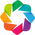

In [5]:
hvPlotters.setPlotters()
# import bokeh
# import holoviews as hv
# hv.extension('bokeh')

## Load data

In [6]:
# Assume job/orb dir format

# Set/check working dir - set for N2O data on Stimpy
currDir = os.getcwd()
if winFlag:
    workingDir = r'D:\VMs\Share\ePSshare\N2O\N20_wf'  # UB20 VM shared dir
else:
#     workingDir = r'/mnt/diskstationSSHFS/homes/admin/CloudStation/Backup/STIMPY/D/projects/ePolyScat/n2' # N2 test dataset
    workingDir = r'/mnt/femtofastSSHFS/FemtoShare/Results/ePolyScat_stuff/xef2/xef2_1.0-60.1eV' # XeF2 test dataset
#     workingDir = !pwd

print(workingDir)


# Scan for subdirs, based on existing routine in getFiles()
fileBase = workingDir
# fType = ''
# fList = [os.path.join(fileBase, f) for f in os.listdir(fileBase) if f.endswith(fType)]

# For other methods overview/refresher, see 
#  - https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory
#  - https://stackoverflow.com/questions/973473/getting-a-list-of-all-subdirectories-in-the-current-directory
#  - Fast recursive subdir (with scandir) https://stackoverflow.com/a/59803793/2441026
# Also epsman routines.

/mnt/femtofastSSHFS/FemtoShare/Results/ePolyScat_stuff/xef2/xef2_1.0-60.1eV


Compatibility...

- Old structure, with multiple orb output files per dir (but not per E range).
- New structure, with multiple output files per E range, subdirs per orb

Should scan dirs for file types or by stem to confirm?  See ePSman code for ideas...

Maybe just assume that if files are in root dir no E stacking is required? This would fail for single job case however.

How about checking for prefixes, as per wfPlot.py code? Uses epsproc.util.fileListSort to set prefix.

In [7]:
XeF2data = ePSmultiJob(fileBase, verbose = 0)
XeF2data.scanFiles()
XeF2data.jobsSummary()

Found 1 directories, with 6 files.
Job structure: rootDir

*** Job dir 0 details
Directory: /mnt/femtofastSSHFS/FemtoShare/Results/ePolyScat_stuff/xef2/xef2_1.0-60.1eV
6 files
{   'batch': 'ePS xef2, batch xef2_1.0-60.1eV, orbital orb12_A1G',
    'event': 'orb 12 ioinzation (Iodine 3d, A1G/SG), sph/ grid',
    'orbE': -703.9884888620219,
    'orbLabel': 'Iodine 3d, A1G/SG'}
{   'batch': 'ePS xef2, batch xef2_1.0-60.1eV, orbital orb13_E1G',
    'event': 'orb 13 ioinzation (Iodine 3d, E1G/PG), sph/ grid',
    'orbE': -703.8850855951459,
    'orbLabel': 'Iodine 3d, E1G/PG'}
{   'batch': 'ePS xef2, batch xef2_1.0-60.1eV, orbital orb15_E2G',
    'event': 'orb 15 ioinzation (Iodine 3d, E2G/DG), sph/ grid',
    'orbE': -703.626577427956,
    'orbLabel': 'Iodine 3d, E2G/DG'}
{   'batch': 'ePS xef2, batch xef2_1.0-60.1eV, orbital orb21_A1G',
    'event': 'orb 21 ioinzation (Iodine 4d, A1G/SG), sph/ grid',
    'orbE': -76.581003676086,
    'orbLabel': 'Iodine 4d, A1G/SG'}
{   'batch': 'ePS xef2,

## Further class dev

In [8]:
# Basic LM plot wrapper
# See https://epsproc.readthedocs.io/en/latest/demos/ePSproc_demo_matE_plotting_Feb2020.html for a refresher

def testFn(self, **kwargs):
    # Plot with sensible defaults - all dims
#     daPlot, daPlotpd, legendList, gFig = ep.lmPlot(self.dataSets[0]['matE'][0], **kwargs)
#                                                    selDims = {'Type':'L'},
#                                                    fillna = True,
#                                                    thres = 0.5
#                                                    thresType='pc', thres = 0.1,
                                                   
#                                                   )
    
#     xDim = 'Ehv'  # Need to switch dims first

    # Using BOTH kwargs and lmPlotOpts works provided there are no repeated parameters
#     daPlot, daPlotpd, legendList, gFig = ep.lmPlot(self.dataSets[0]['matE'][0], **kwargs, **self.lmPlotOpts)

    # Check passed args vs. self.lmPlotOpts and overwrite
    if kwargs:
        for key, value in kwargs.items():
            self.lmPlotOpts[key] = value
            
    daPlot, daPlotpd, legendList, gFig = ep.lmPlot(self.dataSets[0]['matE'][0], **self.lmPlotOpts)
    
    self.daPlotpd = daPlotpd

In [9]:
def lmPlot(self, Erange = None, Etype = 'Eke', refData = None, **kwargs):
    """
    Wrapper for :py:func:`epsproc.lmPlot` for multijob class. Run lmPlot() for each dataset.
    
    Parameters
    ----------
    Erange : list of int or float, optional, default = None
        Set plot range [Emin, Emax]. Defaults to full data range if not set
        
    Etype : str, optional, default = 'Eke'
        Set plot dimension, either 'Eke' (electron kinetic energy) or 'Ehv' (photon energy).
        
    refData : tuple (key,m), optional, default = None
        If set, calculate difference plots against reference dataset.
        TODO: implement difference plots.
        TODO: implement testing logic, may fail without E-axis forcing, and sym summation?
    
    kwargs : dict, optional, default = {}
        Plotting options to pass to :py:func:`epsproc.lmPlot`.
        These will also be set in self.lmPlotOpts for further use.
        Note that any existing options in self.lmPlotOpts will also be used, or overwritten if matching keys are found.
    
    
    Notes
    -----
    Basic scheme from ePSmultijob.plotGetCro, which loops and switches on Eke/Ehv. Should tidy up at some point.
    
    """
    
    # Set lmPlotOpts
    # Check passed args vs. self.lmPlotOpts and overwrite
    if kwargs:
        for key, value in kwargs.items():
            self.lmPlotOpts[key] = value
            

    # Loop over datasets
    for key in self.dataSets:
#                 testClass.dataSets[key]['XS'][0].sel(XC='SIGMA', Eke=slice(Erange[0], Erange[1])).plot.line(x='Eke', col='Type')   # This works

        # Init empty list for daPlotpd data
        self.dataSets[key]['daPlotpd'] = [] 
    
        for m, item in enumerate(self.dataSets[key]['matE']):

            # Set default to full range, same for all cases
            if Erange is None:
                Erange = [self.dataSets[key]['matE'][m][Etype].min().data, self.dataSets[key]['matE'][m][Etype].max().data]


            # More elegant way to swap on dims?
            if Etype == 'Ehv':
            # Subset before plot to avoid errors on empty array selection!
                subset = self.dataSets[key]['matE'][m].swap_dims({'Eke':'Ehv'}).sel(**{Etype:slice(Erange[0], Erange[1])})   # With dict unpacking for var as keyword

            else:
                subset = self.dataSets[key]['matE'][m].sel(**{Etype:slice(Erange[0], Erange[1])})   # With dict unpacking for var as keyword

            # Run lmPlot
            if subset.any():
                daPlot, daPlotpd, legendList, gFig = ep.lmPlot(subset, xDim = Etype, **self.lmPlotOpts)
            else:
                daPlotpd = None
                
            self.dataSets[key]['daPlotpd'].append(daPlotpd)  # Set to include None cases to keep indexing. Should set as dict instead?

    
    

In [10]:
# Monkey patch for new plotters
# See, e.g., https://stackoverflow.com/a/2982
import types

testClass = XeF2data

testClass.testFn = types.MethodType(testFn, testClass)

testClass.lmPlot = types.MethodType(lmPlot, testClass)

In [11]:
testClass.testFn

<bound method testFn of <epsproc.classes.multiJob.ePSmultiJob object at 0x7faee2d7c090>>

In [12]:
# Test arg passing from self.

testClass.lmPlotOpts = {'selDims' : {'Type':'L'}, 'fillna' : True, 'thres' : 0.5}
# testClass.lmPlotOpts = {}

Plotting data xef2_1.0-60.1eV_orb12_A1G.inp.out, pType=a, thres=0.5, with Seaborn


/home/femtolab/anaconda3/envs/epsdev/lib/python3.7/site-packages/xarray/core/nputils.py:223: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


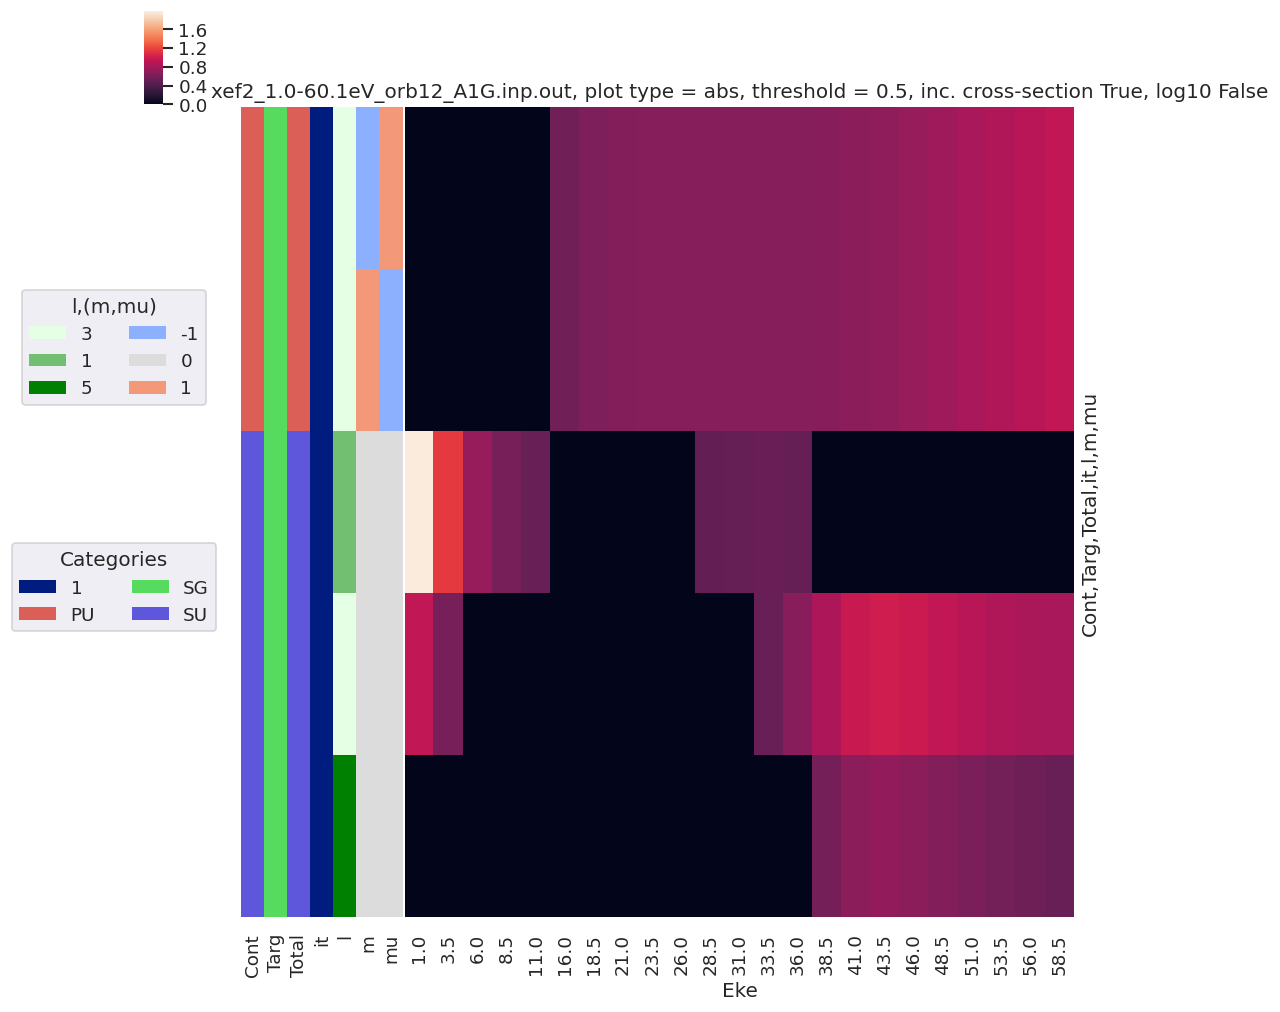

In [13]:
# testClass.testFn(selDims = {'Type':'L'}, fillna = True,)
testClass.testFn()

In [14]:
testClass.lmPlotOpts

{'selDims': {'Type': 'L'}, 'fillna': True, 'thres': 0.5}

In [15]:
testClass.daPlotpd

Eke                             1.0       3.5       6.0      8.5       11.0  \
Cont Targ Total it l m  mu                                                    
PU   SG   PU    1  3 -1  1  0.000000  0.000000  0.000000  0.00000  0.000000   
                      1 -1  0.000000  0.000000  0.000000  0.00000  0.000000   
SU   SG   SU    1  1  0  0  1.973001  1.161340  0.746089  0.59677  0.528383   
                   3  0  0  0.938467  0.596999  0.000000  0.00000  0.000000   
                   5  0  0  0.000000  0.000000  0.000000  0.00000  0.000000   

Eke                             16.0     18.5      21.0     23.5      26.0  \
Cont Targ Total it l m  mu                                                   
PU   SG   PU    1  3 -1  1  0.565334  0.62844  0.657224  0.66613  0.666624   
                      1 -1  0.565334  0.62844  0.657224  0.66613  0.666624   
SU   SG   SU    1  1  0  0  0.000000  0.00000  0.000000  0.00000  0.000000   
                   3  0  0  0.000000  0.00000  0.000000  0.00000  0.000000   
                   5  0  0  0.000000  0.00000  0.000000  0.00000  0.000000   

Eke                         ...      36.0      38.5      41.0      43.5  \
Cont Targ Total it l m  mu  ...                                           
PU   SG   PU    1  3 -1  1  ...  0.668839  0.677864  0.693088  0.715616   
                      1 -1  ...  0.668839  0.677864  0.693088  0.715616   
SU   SG   SU    1  1  0  0  ...  0.523686  0.000000  0.000000  0.000000   
                   3  0  0  ...  0.674166  0.846535  0.975418  1.008676   
                   5  0  0  ...  0.000000  0.586930  0.693467  0.720165   

Eke                             46.0      48.5      51.0      53.5      56.0  \
Cont Targ Total it l m  mu                                                     
PU   SG   PU    1  3 -1  1  0.745522  0.781449  0.820896  0.861077  0.899768   
                      1 -1  0.745522  0.781449  0.820896  0.861077  0.899768   
SU   SG   SU    1  1  0  0  0.000000  0.000000  0.000000  0.000000  0.000000   
                   3  0  0  0.979477  0.934925  0.894847  0.863053  0.838500   
                   5  0  0  0.694076  0.653483  0.614923  0.581819  0.553354   

Eke                             58.5  
Cont Targ Total it l m  mu            
PU   SG   PU    1  3 -1  1  0.935678  
                      1 -1  0.935678  
SU   SG   SU    1  1  0  0  0.000000  
                   3  0  0  0.819403  
                   5  0  0  0.527802  

[5 rows x 23 columns]

/home/femtolab/anaconda3/envs/epsdev/lib/python3.7/site-packages/xarray/core/nputils.py:223: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


Plotting data xef2_1.0-60.1eV_orb12_A1G.inp.out, pType=a, thres=0.5, with Seaborn


/home/femtolab/anaconda3/envs/epsdev/lib/python3.7/site-packages/xarray/core/nputils.py:223: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


Plotting data xef2_1.0-60.1eV_orb13_E1G.inp.out, pType=a, thres=0.5, with Seaborn


/home/femtolab/anaconda3/envs/epsdev/lib/python3.7/site-packages/xarray/core/nputils.py:223: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


Plotting data xef2_1.0-60.1eV_orb15_E2G.inp.out, pType=a, thres=0.5, with Seaborn


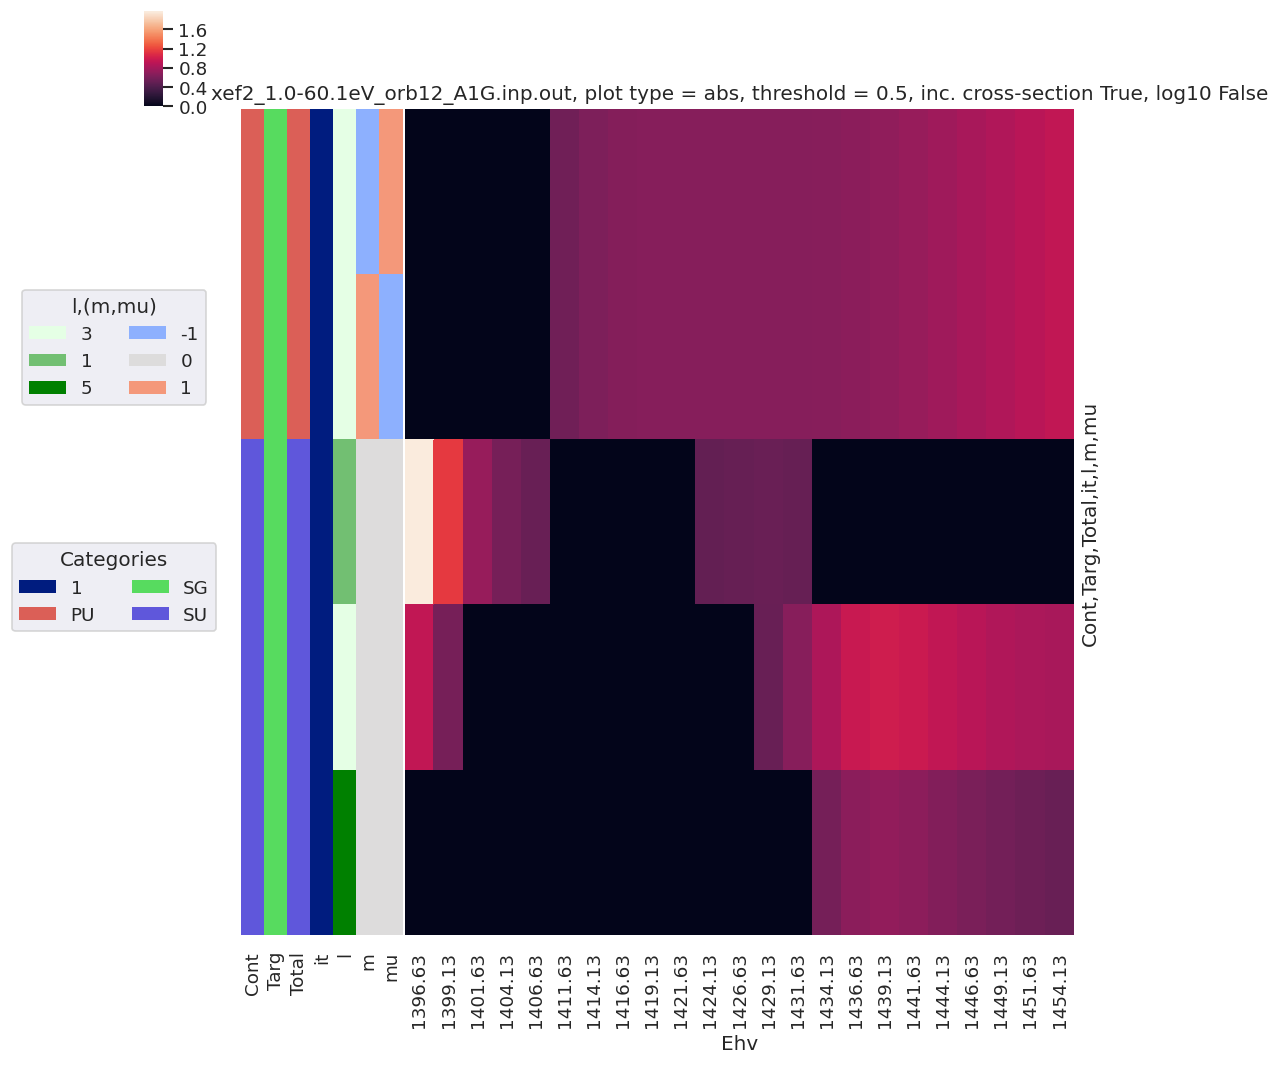

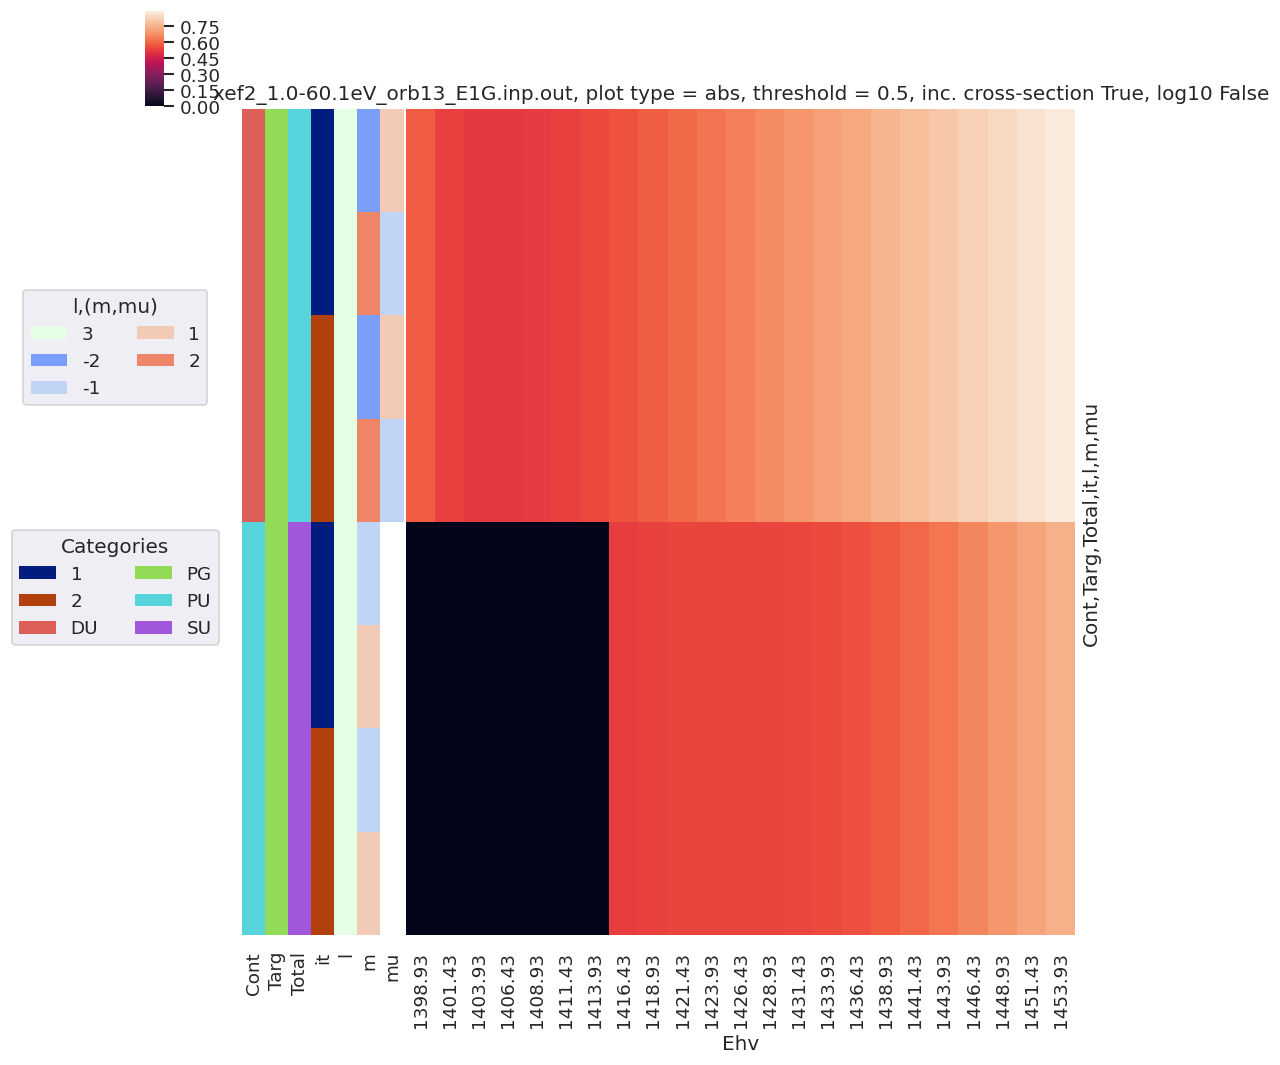

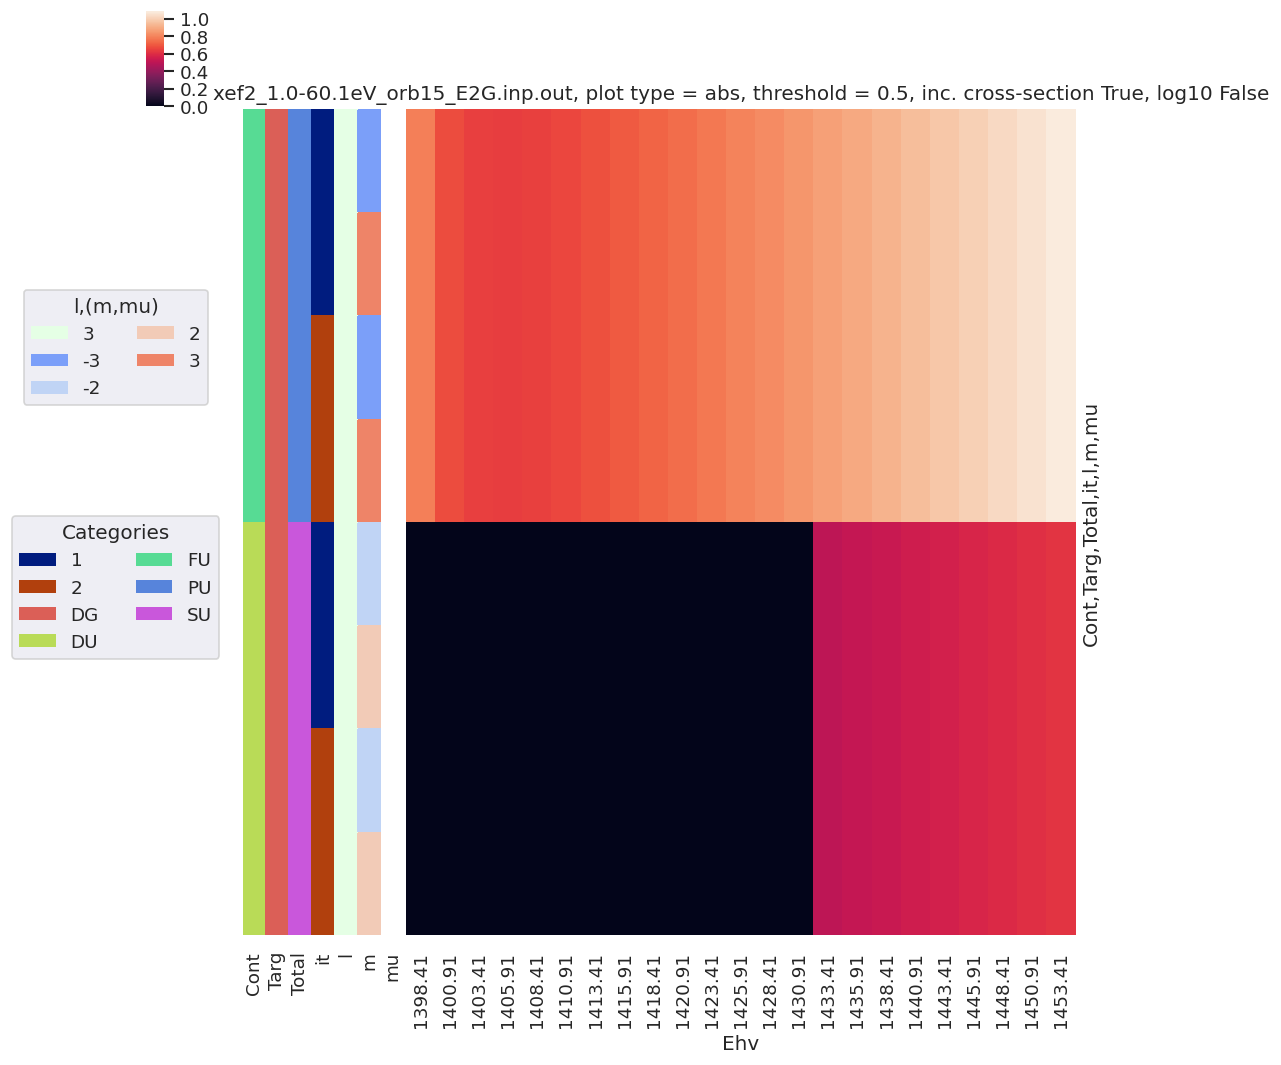

In [16]:
testClass.lmPlot(Etype='Ehv')

In [17]:
testClass.dataSets[0]['daPlotpd'][2]

Ehv                         1398.41   1400.91   1403.41   1405.91   1408.41  \
Cont Targ Total it l m  mu                                                    
FU   DG   PU    1  3 -3  1  0.79432  0.676924  0.647477  0.644706  0.653408   
                      3 -1  0.79432  0.676924  0.647477  0.644706  0.653408   
                2  3 -3  1  0.79432  0.676924  0.647477  0.644706  0.653408   
                      3 -1  0.79432  0.676924  0.647477  0.644706  0.653408   
DU   DG   SU    1  3 -2  0  0.00000  0.000000  0.000000  0.000000  0.000000   
                      2  0  0.00000  0.000000  0.000000  0.000000  0.000000   
                2  3 -2  0  0.00000  0.000000  0.000000  0.000000  0.000000   
                      2  0  0.00000  0.000000  0.000000  0.000000  0.000000   

Ehv                          1410.91  1413.41   1415.91   1418.41   1420.91  \
Cont Targ Total it l m  mu                                                    
FU   DG   PU    1  3 -3  1  0.668084  0.68624  0.706591  0.728422  0.751307   
                      3 -1  0.668084  0.68624  0.706591  0.728422  0.751307   
                2  3 -3  1  0.668084  0.68624  0.706591  0.728422  0.751307   
                      3 -1  0.668084  0.68624  0.706591  0.728422  0.751307   
DU   DG   SU    1  3 -2  0  0.000000  0.00000  0.000000  0.000000  0.000000   
                      2  0  0.000000  0.00000  0.000000  0.000000  0.000000   
                2  3 -2  0  0.000000  0.00000  0.000000  0.000000  0.000000   
                      2  0  0.000000  0.00000  0.000000  0.000000  0.000000   

Ehv                         ...   1430.91   1433.41   1435.91   1438.41  \
Cont Targ Total it l m  mu  ...                                           
FU   DG   PU    1  3 -3  1  ...  0.849032  0.874397  0.899988  0.925758   
                      3 -1  ...  0.849032  0.874397  0.899988  0.925758   
                2  3 -3  1  ...  0.849032  0.874397  0.899988  0.925758   
                      3 -1  ...  0.849032  0.874397  0.899988  0.925758   
DU   DG   SU    1  3 -2  0  ...  0.000000  0.505420  0.520468  0.535434   
                      2  0  ...  0.000000  0.505420  0.520468  0.535434   
                2  3 -2  0  ...  0.000000  0.505420  0.520468  0.535434   
                      2  0  ...  0.000000  0.505420  0.520468  0.535434   

Ehv                          1440.91   1443.41   1445.91   1448.41   1450.91  \
Cont Targ Total it l m  mu                                                     
FU   DG   PU    1  3 -3  1  0.951670  0.977695  1.003808  1.029990  1.056224   
                      3 -1  0.951670  0.977695  1.003808  1.029990  1.056224   
                2  3 -3  1  0.951670  0.977695  1.003808  1.029990  1.056224   
                      3 -1  0.951670  0.977695  1.003808  1.029990  1.056224   
DU   DG   SU    1  3 -2  0  0.550367  0.565309  0.580294  0.595344  0.610471   
                      2  0  0.550367  0.565309  0.580294  0.595344  0.610471   
                2  3 -2  0  0.550367  0.565309  0.580294  0.595344  0.610471   
                      2  0  0.550367  0.565309  0.580294  0.595344  0.610471   

Ehv                          1453.41  
Cont Targ Total it l m  mu            
FU   DG   PU    1  3 -3  1  1.082498  
                      3 -1  1.082498  
                2  3 -3  1  1.082498  
                      3 -1  1.082498  
DU   DG   SU    1  3 -2  0  0.625674  
                      2  0  0.625674  
                2  3 -2  0  0.625674  
                      2  0  0.625674  

[8 rows x 23 columns]

In [18]:
testClass.dataSets[0]['daPlotpd'][2].columns.values

array([1398.41, 1400.91, 1403.41, 1405.91, 1408.41, 1410.91, 1413.41,
       1415.91, 1418.41, 1420.91, 1423.41, 1425.91, 1428.41, 1430.91,
       1433.41, 1435.91, 1438.41, 1440.91, 1443.41, 1445.91, 1448.41,
       1450.91, 1453.41])

In [19]:
testClass.dataSets[0]['daPlotpd'][0].columns.name in ['Eke','Ehv']

True

In [20]:
testClass.dataSets[0]['matE'][3].Ehv

<xarray.DataArray 'Ehv' (Eke: 24)>
array([141.81, 144.31, 146.81, 149.31, 151.81, 154.31, 156.81, 159.31,
       161.81, 164.31, 166.81, 169.31, 171.81, 174.31, 176.81, 179.31,
       181.81, 184.31, 186.81, 189.31, 191.81, 194.31, 196.81, 199.31])
Coordinates:
    Ehv      (Eke) float64 141.8 144.3 146.8 149.3 ... 191.8 194.3 196.8 199.3
  * Eke      (Eke) float64 1.0 3.5 6.0 8.5 11.0 ... 48.5 51.0 53.5 56.0 58.5
    SF       (Eke) complex128 (1.9894315+4.0550699j) ... (4.5830889+1.7602285j)

## Test reindexing and interp...

In [36]:
key=0
m=2
Etype='Ehv'
Erange=[1396, 1500]
subset2 = testClass.dataSets[key]['matE'][m].swap_dims({'Eke':'Ehv'}).sel(**{Etype:slice(Erange[0], Erange[1])})
# daPlot, daPlotpd, legendList, gFig = ep.lmPlot(subset, xDim = Etype)
subset2

<xarray.DataArray 'xef2_1.0-60.1eV_orb15_E2G.inp.out' (LM: 32, Ehv: 23, Sym: 3, mu: 3, it: 2, Type: 2)>
array([[[[[[           nan          +nanj,
                       nan          +nanj],
           [           nan          +nanj,
                       nan          +nanj]],

          [[           nan          +nanj,
                       nan          +nanj],
           [           nan          +nanj,
                       nan          +nanj]],

          [[           nan          +nanj,
                       nan          +nanj],
           [           nan          +nanj,
                       nan          +nanj]]],


         [[[           nan          +nanj,
                       nan          +nanj],
           [           nan          +nanj,
                       nan          +nanj]],

          [[           nan          +nanj,
                       nan          +nanj],
           [           nan          +nanj,
                       nan          +nanj]],

          [[  

Set dataType (No dataType)
Plotting data (No filename), pType=r, thres=0.01, with Seaborn


No handles with labels found to put in legend.


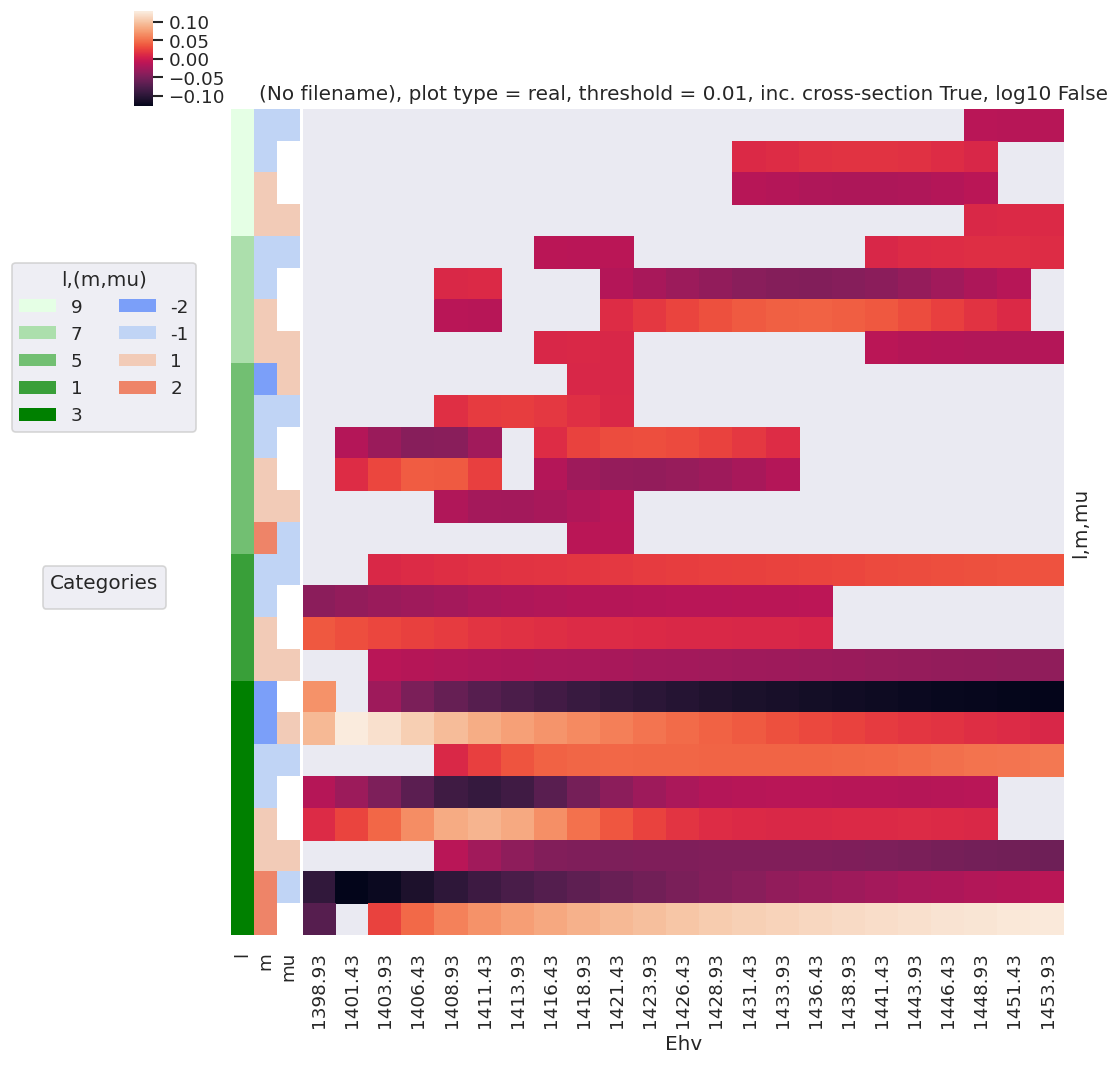

In [56]:
# Test cases...
# - Without reindexing, differing E axes will produce null result.

# Without sym sum - null result if differnet symmetry dims.
# (subset-subset2) #.sel(Type='L',it=1).sum('mu').pipe(np.abs).plot.line(x=Etype, col='Sym')

# With sym sum
# (subset.sum('Sym')-subset2.sum('Sym'))

# With reindexing - this gives non-null result
# ep.lmPlot((subset.sum('Sym')-subset2.sum('Sym').reindex(Ehv=subset.Ehv, method='nearest')), xDim='Ehv');
ep.lmPlot((subset.sum('Sym')-subset2.sum('Sym').reindex(Ehv=subset.Ehv, method='nearest', tolerance=1)).sel(Type='L',it=1), xDim='Ehv', pType='r');

# Without sym sum - null result
# (subset-subset2.reindex(Ehv=subset.Ehv, method='nearest'))

# Reindex and 

In [40]:
subset.Ehv

<xarray.DataArray 'Ehv' (Ehv: 24)>
array([1396.43, 1398.93, 1401.43, 1403.93, 1406.43, 1408.93, 1411.43, 1413.93,
       1416.43, 1418.93, 1421.43, 1423.93, 1426.43, 1428.93, 1431.43, 1433.93,
       1436.43, 1438.93, 1441.43, 1443.93, 1446.43, 1448.93, 1451.43, 1453.93])
Coordinates:
  * Ehv      (Ehv) float64 1.396e+03 1.399e+03 1.401e+03 ... 1.451e+03 1.454e+03
    Eke      (Ehv) float64 1.0 3.5 6.0 8.5 11.0 ... 48.5 51.0 53.5 56.0 58.5
    SF       (Ehv) complex128 (1.9894315+4.0550699j) ... (4.5830889+1.7602285j)

In [41]:
subset2.Ehv

<xarray.DataArray 'Ehv' (Ehv: 23)>
array([1398.41, 1400.91, 1403.41, 1405.91, 1408.41, 1410.91, 1413.41, 1415.91,
       1418.41, 1420.91, 1423.41, 1425.91, 1428.41, 1430.91, 1433.41, 1435.91,
       1438.41, 1440.91, 1443.41, 1445.91, 1448.41, 1450.91, 1453.41])
Coordinates:
  * Ehv      (Ehv) float64 1.398e+03 1.401e+03 1.403e+03 ... 1.451e+03 1.453e+03
    Eke      (Ehv) float64 3.5 6.0 8.5 11.0 13.5 ... 48.5 51.0 53.5 56.0 58.5
    SF       (Ehv) complex128 (2.167719+3.7215541j) ... (4.5830889+1.7602285j)

In [ ]:
testClass.dataSets[0]['daPlotpd'][0].columns.values

In [ ]:
testClass.dataSets[0]['matE'][0].Ehv.round(2)

In [ ]:
testClass.dataSets[0]['matE'][0]['Ehv'] = testClass.dataSets[0]['matE'][0].Ehv.round(2)

In [ ]:
testClass.dataSets[0]['matE'][0].Ehv

## Versions

In [ ]:
import scooby
scooby.Report(additional=['epsproc', 'xarray'])

## OLD DEV CODE BELOW

## Plotting

In [ ]:
Erange = [0, 60]
Etype = 'Eke'
for key in testClass.dataSets:
#     testClass.dataSets[key]['XS'][1].sel(XC='SIGMA', Eke=slice(Erange[0], Erange[1])).plot.line(x=Etype, col='Type')   # This works
    testClass.dataSets[key]['XS'][0].sel(XC='SIGMA', **{Etype:slice(Erange[0], Erange[1])}).plot.line(x=Etype, col='Type')   # This works

In [ ]:
Erange = [700, 800]
Etype = 'Ehv'
for key in testClass.dataSets:
#     testClass.dataSets[key]['XS'][1].sel(XC='SIGMA', Eke=slice(Erange[0], Erange[1])).plot.line(x=Etype, col='Type')   # This works
    
    testClass.dataSets[key]['XS'][0].swap_dims({'Eke':'Ehv'}).sel(XC='SIGMA', **{Etype:slice(Erange[0], Erange[1])}).plot.line(x=Etype, col='Type')   # This works

#     temp = testClass.dataSets[key]['XS'][0].copy().swap_dims({'Eke':'Ehv'})
#     temp.sel(XC='SIGMA', **{Etype:slice(Erange[0], Erange[1])}).plot.line(x='Ehv', col='Type')   # This works

In [ ]:
testClass.plotGetCro(Etype='Eke')

In [ ]:
testClass.plotGetCro(Etype='Ehv')

In [ ]:
testClass.plotGetCro(pType='BETA', Etype='Eke')

In [ ]:
# from matplotlib import pyplot as plt
testClass.plotGetCroComp(pType='BETA', Etype='Ehv')
# plt.legend(['1','2','3'])

In [ ]:
key=0
m=0
testClass.dataSets[key]['XS'][m].attrs #['file'].rsplit('/',maxsplit=1)[0]

In [ ]:
temp = testClass.dataSets[key]['XS'][m].attrs['orbX'].orb.data[0]
print(temp)

In [ ]:
# testClass.dataSets[key]['XS'][m].swap_dims({'Eke':'Ehv'}).sel(XC=pType, Type=pGauge, Sym=pSym, **{Etype:slice(Erange[0], Erange[1])})
m=0
Erange=[600,700]
Etype='Eke'
subset=testClass.dataSets[0]['XS'][m].sel(XC='SIGMA', Type='L', Sym=('All','All'), **{Etype:slice(Erange[0], Erange[1])})
subset.any()

In [ ]:
# Beta comparison plot over orbs
Erange = [50, 250]
lText = []
for n, key in enumerate(dataSets):
    dataSetsHV[key]['XS'].sel(XC='BETA', Type='L', Sym=('All','All'), Ehv=slice(Erange[0], Erange[1])).plot.line(x='Ehv')   # This works
    lText.append(dataSetsHV[key]['XS'].attrs['fileBase'].rsplit('/',maxsplit=1)[1])

plt.legend(lText)

## Dataset formatting

Stack (XS, MatE, orb, E)?

In [ ]:
# Single da conversion
testClass.dataSets[0]['XS'][0].to_dataset()

In [ ]:
# By stacking
ds = xr.Dataset()
ds['orb1'] = testClass.dataSets[0]['XS'][0]
ds

In [ ]:
ds.orb1

## Scratch

In [ ]:
(testClass.dataSets[0]['XS'][0].attrs['file'])

In [ ]:
fList = [item.attrs['file'] for item in testClass.dataSets[0]['XS']]
fList

In [ ]:

fN = [len(item['fList']) for item in testClass.jobs['files'].values()]
sum(fN)

In [ ]:
testClass.jobs['files'].values()

In [ ]:
type(testClass.dataSets)

In [ ]:
testClass.dataSets.keys()

In [ ]:
# testClass.dataSets[0]['XS'][0].attrs
len(testClass.dataSets[0]['XS'])

In [ ]:
testClass.dataSets[0]['XS'][1].attrs['jobInfo']

SEE jobSummary(), jobInfo and molInfo next...

In [ ]:
jobInfo, orbInfo = ep.jobSummary(testClass.dataSets[0]['XS'][1].attrs['jobInfo'], testClass.dataSets[0]['XS'][1].attrs['molInfo']);

In [ ]:
orbInfo

In [ ]:
testClass.dataSets[0]['XS'][1].molInfo['orbTable'].coords['OrbGrp'] 

In [ ]:
orbX, orbInfo = ep.summary.getOrbInfo(testClass.dataSets[0]['XS'][1].attrs['jobInfo'], testClass.dataSets[0]['XS'][1].attrs['molInfo']);

In [ ]:
orbX['E'].data[0]

In [ ]:
orbX

In [ ]:
molInfo = testClass.dataSets[0]['XS'][1].molInfo
orbOut = molInfo['orbTable'].where(molInfo['orbTable'].coords['OrbGrp'] == orbInfo['iOrbGrp'], drop=True)

In [ ]:
orbOut.E

In [ ]:
temp = {}

In [ ]:
temp[1] = 'an item'

In [ ]:
temp